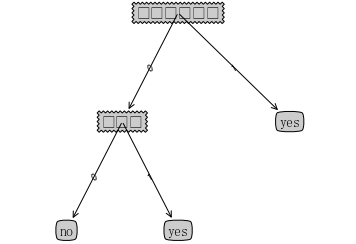

放贷


In [2]:
# -*- coding: UTF-8 -*-

from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt

from math import log

import operator

import pickle


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

"""

函数说明:计算给定数据集的经验熵(香农熵)



Parameters:

	dataSet - 数据集

Returns:

	shannonEnt - 经验熵(香农熵)

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def calcShannonEnt(dataSet):

	numEntires = len(dataSet)						#返回数据集的行数

	labelCounts = {}								#保存每个标签(Label)出现次数的字典

	for featVec in dataSet:							#对每组特征向量进行统计

		currentLabel = featVec[-1]					#提取标签(Label)信息

		if currentLabel not in labelCounts.keys():	#如果标签(Label)没有放入统计次数的字典,添加进去

			labelCounts[currentLabel] = 0

		labelCounts[currentLabel] += 1				#Label计数

	shannonEnt = 0.0								#经验熵(香农熵)

	for key in labelCounts:							#计算香农熵

		prob = float(labelCounts[key]) / numEntires	#选择该标签(Label)的概率

		shannonEnt -= prob * log(prob, 2)			#利用公式计算

	return shannonEnt								#返回经验熵(香农熵)



"""

函数说明:创建测试数据集



Parameters:

	无

Returns:

	dataSet - 数据集

	labels - 特征标签

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-20

"""

def createDataSet():

	dataSet = [[0, 0, 0, 0, 'no'],						#数据集

			[0, 0, 0, 1, 'no'],

			[0, 1, 0, 1, 'yes'],

			[0, 1, 1, 0, 'yes'],

			[0, 0, 0, 0, 'no'],

			[1, 0, 0, 0, 'no'],

			[1, 0, 0, 1, 'no'],

			[1, 1, 1, 1, 'yes'],

			[1, 0, 1, 2, 'yes'],

			[1, 0, 1, 2, 'yes'],

			[2, 0, 1, 2, 'yes'],

			[2, 0, 1, 1, 'yes'],

			[2, 1, 0, 1, 'yes'],

			[2, 1, 0, 2, 'yes'],

			[2, 0, 0, 0, 'no']]

	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签

	return dataSet, labels 							#返回数据集和分类属性



"""

函数说明:按照给定特征划分数据集



Parameters:

	dataSet - 待划分的数据集

	axis - 划分数据集的特征

	value - 需要返回的特征的值

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def splitDataSet(dataSet, axis, value):		

	retDataSet = []										#创建返回的数据集列表

	for featVec in dataSet: 							#遍历数据集

		if featVec[axis] == value:

			reducedFeatVec = featVec[:axis]				#去掉axis特征

			reducedFeatVec.extend(featVec[axis+1:]) 	#将符合条件的添加到返回的数据集

			retDataSet.append(reducedFeatVec)

	return retDataSet		  							#返回划分后的数据集



"""

函数说明:选择最优特征



Parameters:

	dataSet - 数据集

Returns:

	bestFeature - 信息增益最大的(最优)特征的索引值

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-20

"""

def chooseBestFeatureToSplit(dataSet):

	numFeatures = len(dataSet[0]) - 1					#特征数量

	baseEntropy = calcShannonEnt(dataSet) 				#计算数据集的香农熵

	bestInfoGain = 0.0  								#信息增益

	bestFeature = -1									#最优特征的索引值

	for i in range(numFeatures): 						#遍历所有特征

		#获取dataSet的第i个所有特征

		featList = [example[i] for example in dataSet]

		uniqueVals = set(featList)     					#创建set集合{},元素不可重复

		newEntropy = 0.0  								#经验条件熵

		for value in uniqueVals: 						#计算信息增益

			subDataSet = splitDataSet(dataSet, i, value) 		#subDataSet划分后的子集

			prob = len(subDataSet) / float(len(dataSet))   		#计算子集的概率

			newEntropy += prob * calcShannonEnt(subDataSet) 	#根据公式计算经验条件熵

		infoGain = baseEntropy - newEntropy 					#信息增益

		# print("第%d个特征的增益为%.3f" % (i, infoGain))			#打印每个特征的信息增益

		if (infoGain > bestInfoGain): 							#计算信息增益

			bestInfoGain = infoGain 							#更新信息增益，找到最大的信息增益

			bestFeature = i 									#记录信息增益最大的特征的索引值

	return bestFeature 											#返回信息增益最大的特征的索引值





"""

函数说明:统计classList中出现此处最多的元素(类标签)



Parameters:

	classList - 类标签列表

Returns:

	sortedClassCount[0][0] - 出现此处最多的元素(类标签)

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def majorityCnt(classList):

	classCount = {}

	for vote in classList:										#统计classList中每个元素出现的次数

		if vote not in classCount.keys():classCount[vote] = 0	

		classCount[vote] += 1

	sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)		#根据字典的值降序排序

	return sortedClassCount[0][0]								#返回classList中出现次数最多的元素



"""

函数说明:创建决策树



Parameters:

	dataSet - 训练数据集

	labels - 分类属性标签

	featLabels - 存储选择的最优特征标签

Returns:

	myTree - 决策树

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-25

"""

def createTree(dataSet, labels, featLabels):

	classList = [example[-1] for example in dataSet]			#取分类标签(是否放贷:yes or no)

	if classList.count(classList[0]) == len(classList):			#如果类别完全相同则停止继续划分

		return classList[0]

	if len(dataSet[0]) == 1 or len(labels) == 0:									#遍历完所有特征时返回出现次数最多的类标签

		return majorityCnt(classList)

	bestFeat = chooseBestFeatureToSplit(dataSet)				#选择最优特征

	bestFeatLabel = labels[bestFeat]							#最优特征的标签

	featLabels.append(bestFeatLabel)

	myTree = {bestFeatLabel:{}}									#根据最优特征的标签生成树

	del(labels[bestFeat])										#删除已经使用特征标签

	featValues = [example[bestFeat] for example in dataSet]		#得到训练集中所有最优特征的属性值

	uniqueVals = set(featValues)								#去掉重复的属性值

	for value in uniqueVals:									#遍历特征，创建决策树。

		subLabels = labels[:]

		myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)

        

	return myTree



"""

函数说明:获取决策树叶子结点的数目



Parameters:

	myTree - 决策树

Returns:

	numLeafs - 决策树的叶子结点的数目

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def getNumLeafs(myTree):

    numLeafs = 0												#初始化叶子

    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]

    secondDict = myTree[firstStr]								#获取下一组字典

    for key in secondDict.keys():

        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点

            numLeafs += getNumLeafs(secondDict[key])

        else:   numLeafs +=1

    return numLeafs



"""

函数说明:获取决策树的层数



Parameters:

	myTree - 决策树

Returns:

	maxDepth - 决策树的层数

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def getTreeDepth(myTree):

    maxDepth = 0												#初始化决策树深度

    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]

    secondDict = myTree[firstStr]								#获取下一个字典

    for key in secondDict.keys():

        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点

            thisDepth = 1 + getTreeDepth(secondDict[key])

        else:   thisDepth = 1

        if thisDepth > maxDepth: maxDepth = thisDepth			#更新层数

    return maxDepth



"""

函数说明:绘制结点



Parameters:

	nodeTxt - 结点名

	centerPt - 文本位置

	parentPt - 标注的箭头位置

	nodeType - 结点格式

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

"""

def plotNode(nodeTxt, centerPt, parentPt, nodeType):

	arrow_args = dict(arrowstyle="<-")											#定义箭头格式

	font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)		#设置中文字体

	createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点

		xytext=centerPt, textcoords='axes fraction',

		va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)



"""

函数说明:标注有向边属性值



Parameters:

	cntrPt、parentPt - 用于计算标注位置

	txtString - 标注的内容

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

""" 

def plotMidText(cntrPt, parentPt, txtString):

	xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置					

	yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]

	createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)



"""

函数说明:绘制决策树



Parameters:

	myTree - 决策树(字典)

	parentPt - 标注的内容

	nodeTxt - 结点名

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

""" 

def plotTree(myTree, parentPt, nodeTxt):

	decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式

	leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式

	numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度

	depth = getTreeDepth(myTree)															#获取决策树层数

	firstStr = next(iter(myTree))															#下个字典     											

	cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置

	plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值

	plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点

	secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点

	plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移

	for key in secondDict.keys():								

		if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点

			plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制

		else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值 											

			plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW

			plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)

			plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))

	plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD



"""

函数说明:创建绘制面板



Parameters:

	inTree - 决策树(字典)

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-24

""" 

def createPlot(inTree):

    fig = plt.figure(1, facecolor='white')													#创建fig

    fig.clf()																				#清空fig

    axprops = dict(xticks=[], yticks=[])

    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴

    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目

    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数

    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移

    plotTree(inTree, (0.5,1.0), '')															#绘制决策树

    plt.show()																				#显示绘制结果



"""

函数说明:使用决策树分类



Parameters:

	inputTree - 已经生成的决策树

	featLabels - 存储选择的最优特征标签

	testVec - 测试数据列表，顺序对应最优特征标签

Returns:

	classLabel - 分类结果

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-25

""" 

def classify(inputTree, featLabels, testVec):

	firstStr = next(iter(inputTree))														#获取决策树结点

	secondDict = inputTree[firstStr]														#下一个字典

	featIndex = featLabels.index(firstStr)												

	for key in secondDict.keys():

		if testVec[featIndex] == key:

			if type(secondDict[key]).__name__ == 'dict':

				classLabel = classify(secondDict[key], featLabels, testVec)

			else: classLabel = secondDict[key]

	return classLabel



"""

函数说明:存储决策树



Parameters:

	inputTree - 已经生成的决策树

	filename - 决策树的存储文件名

Returns:

	无

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-25

""" 

def storeTree(inputTree, filename):

	with open(filename, 'wb') as fw:

		pickle.dump(inputTree, fw)



"""

函数说明:读取决策树



Parameters:

	filename - 决策树的存储文件名

Returns:

	pickle.load(fr) - 决策树字典

Author:

	Jack Cui

Blog:

	http://blog.csdn.net/c406495762

Modify:

	2017-07-25

""" 

def grabTree(filename):

	fr = open(filename, 'rb')

	return pickle.load(fr)





if __name__ == '__main__':

	dataSet, labels = createDataSet()

	featLabels = []

	myTree = createTree(dataSet, labels, featLabels)

	createPlot(myTree)

	testVec = [0,1]										#测试数据

	result = classify(myTree, featLabels, testVec)

	if result == 'yes':

		print('放贷')

	if result == 'no':

		print('不放贷')